# CV Assignment 2

# Suman Roy (MDS202041) 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1.a)

In [15]:
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')
img3 = cv2.imread('image3.jpg')

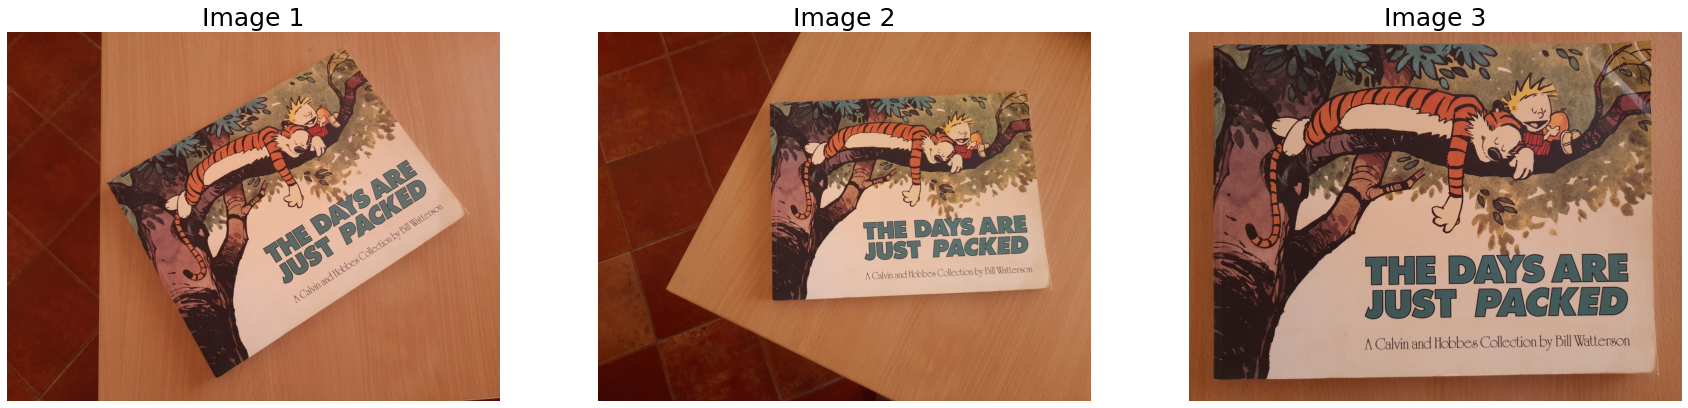

In [4]:
## Displaying 3 images

fig, axs = plt.subplots(1,3, figsize = (30,20))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0].set_title("Image 1", fontsize = 25)
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[1].set_title("Image 2", fontsize = 25)
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
axs[2].set_title("Image 3", fontsize = 25)
axs[2].axis('off')

plt.show()

In [5]:
# function to display the coordinates of 
# of the points clicked on the image  
def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        print(x, ' ', y) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font, 
                    1, (255, 0, 0), 2) 
        cv2.imshow('image', img) 
  
    # checking for right mouse clicks      
    if event==cv2.EVENT_RBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        print(x, ' ', y) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        b = img[y, x, 0] 
        g = img[y, x, 1] 
        r = img[y, x, 2] 
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r), 
                    (x,y), font, 1, 
                    (255, 255, 0), 2) 
        cv2.imshow('image', img) 

In [16]:
### Selecting points from image1

img = img1
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
  
# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows()

816   1217
2724   149
3737   1463
1711   2765


In [17]:
### Selecting points from image2

img = img2
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
  
# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows()

1408   577
3487   502
3658   2071
1434   2178


In [18]:
### pts1 for image1 and pts2 for image2
pts1 = np.array([[816,1217], [2724,149], [3737,1463], [1711,2765]])
pts2 = np.array([[1408,577], [3487,502], [3658,2071], [1434,2178]])

# 1.b)

In [19]:
#using own homography function
def homography(pts1, pts2):
    #stacking matrices Ai to find matrix A such that Ai is computed from x_i' = Hx_i
    n = len(pts1)

    for i in range(n):
        x1,y1 = pts1[i]
        x_1, y_1 = pts2[i]

        Ai = np.array([[-x1, -y1, -1, 0, 0, 0, x1*x_1, y1*x_1, x_1],
                       [0, 0, 0, -x1, -y1, -1, x1*y_1, y1*y_1, y_1]
                      ])
        if i==0:
            A = Ai.copy()
        else:
            A = np.append(A,Ai, axis = 0)
       
    #SVD of A
    u,s,vt = np.linalg.svd(A)
    
    #Getting H by finding the right singular vector corresponding to the smallest singular value
    v = vt.T
    H = v[:,-1]
    
    H = H.reshape((3,3))
    return H

In [25]:
H1 = homography(pts1,pts2)
H1

array([[ 5.11713482e-04, -2.62430419e-04,  8.47764654e-01],
       [ 2.80121462e-04,  5.66509237e-04, -5.30371505e-01],
       [-9.38217399e-09,  2.08641493e-08,  6.54100147e-04]])

# 1.c)

In [26]:
## using openCV homography function
H2, _ = cv2.findHomography(pts1, pts2)
H2 = h.reshape((3,3))
H2

array([[ 7.82316721e-01, -4.01208317e-01,  1.29607776e+03],
       [ 4.28254700e-01,  8.66089451e-01, -8.10841439e+02],
       [-1.43436353e-05,  3.18974845e-05,  1.00000000e+00]])

In [27]:
result1 = cv2.warpPerspective(img1, H1, (4000, 3000))
result2 = cv2.warpPerspective(img1, H2, (4000, 3000))

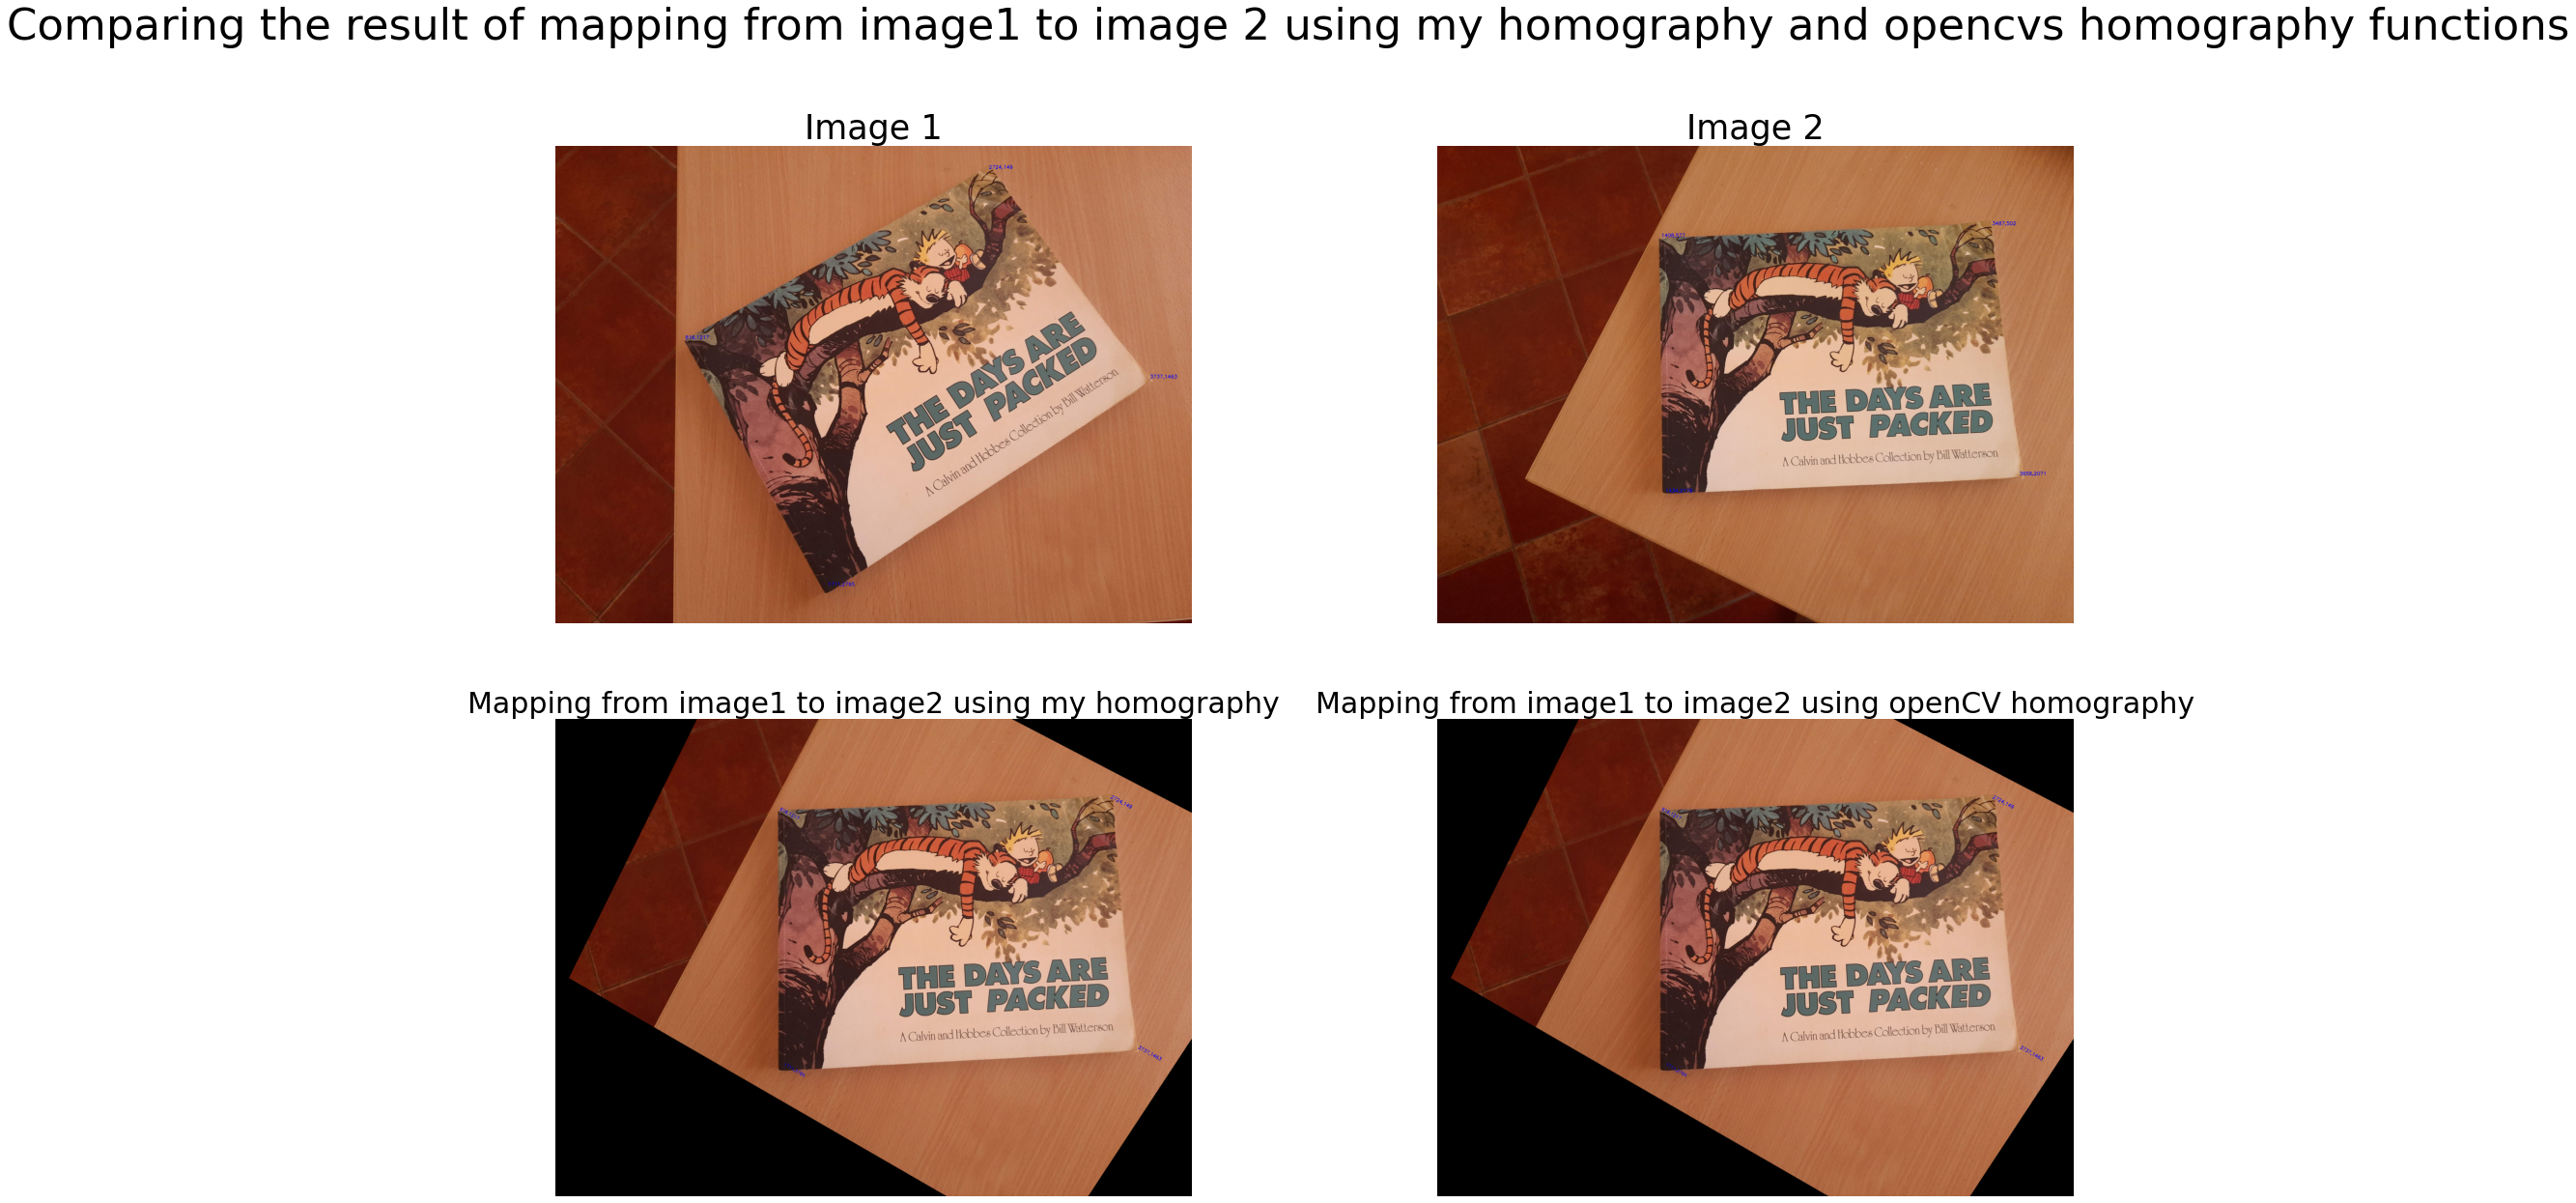

In [30]:
fig, axs = plt.subplots(2,2, figsize = (30,20))
axs[0,0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Image 1", fontsize = 35)
axs[0,0].axis('off')

axs[0,1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[0,1].set_title("Image 2", fontsize = 35)
axs[0,1].axis('off')

axs[1,0].imshow(cv2.cvtColor(result1,cv2.COLOR_BGR2RGB))
axs[1,0].set_title("Mapping from image1 to image2 using my homography", fontsize = 30)
axs[1,0].axis('off')

axs[1,1].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
axs[1,1].set_title("Mapping from image1 to image2 using openCV homography", fontsize = 30)
axs[1,1].axis('off')

plt.suptitle("Comparing the result of mapping from image1 to image 2 using my homography and opencvs homography functions", fontsize = 45)

plt.show()

# 1.d)

There are visible black portion in the background after we have applied homography. This is because there are points which are not on the same place and homography will not be able to align them accordingly. Perhaps a separate homography transformation is needed in this context. We have taken the correspondence points as the four corners of the book. This is why homography is affecting other parts of the image (black pixels) for points being not on the same plane. 

# 2.

In [33]:
#Choosing 4 corner points of book in image1
img = img1
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
  
# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows()

803   1206
2750   149
1711   2829
3737   1473


In [34]:
pts1 = np.array([[803,1206],[2750,149],[1711,2829],[3737,1473]], dtype = np.float64)

In [35]:
#choosing corner points of image 3 and selecting other corner points using the aspect ration of height/width = 30/23
img = img3
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
  
# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows()

211   107
3750   96
211   2829
3803   2776


In [36]:
# Fixing points 1 and 3 of the 3rd image
# Adding width to x coordinates of points 1 and 3

aspect_ratio = (30/23)
height = (2840 - 85)
width = int(height * aspect_ratio)

pts3 = np.zeros((4,2))
pts3[0] = [211,107]
pts3[1] = [(211+width),107]
pts3[2] = [211,2829]
pts3[3] = [(211+width), 2829]

pts3

array([[ 211.,  107.],
       [3804.,  107.],
       [ 211., 2829.],
       [3804., 2829.]])

In [37]:
H = homography(pts1, pts3)
H

array([[ 5.58971231e-04, -3.06334814e-04,  1.44808612e-02],
       [ 3.44364232e-04,  6.39291132e-04, -9.99894596e-01],
       [-6.73991284e-09,  3.40360914e-08,  4.09364502e-04]])

In [38]:
result = cv2.warpPerspective(img1, H, (4000, 3000))

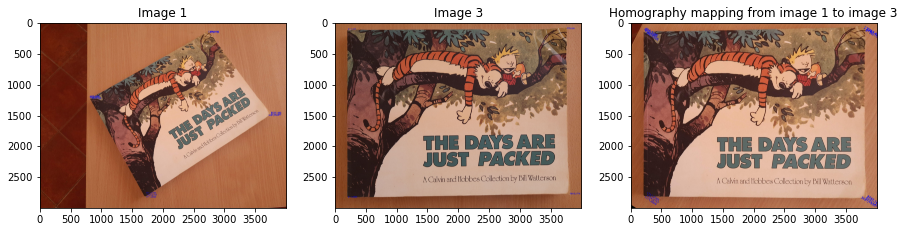

In [39]:
fig, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
axs[0].set_title('Image 1')

axs[1].imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
axs[1].set_title("Image 3")

axs[2].imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
axs[2].set_title("Homography mapping from image 1 to image 3")

plt.show()

# 3.

### Usecases of Homography:

### a) Perspective Correction and cropping:

In image 1 the book is the main subject of the image. But there are some parts of floor/table also as background. But we are only interested in the book. So, using perpective correction we can crop out the photo of the book only. Mobile scanner applications use this kind of method. 

In [40]:
img1.shape

(3000, 4000, 3)

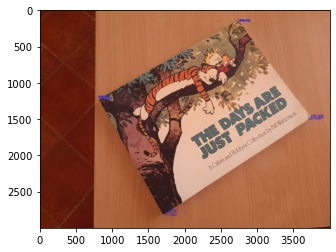

In [41]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

In [42]:
#step 1: selecting four corners of the book in image1
img = img1
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

829   1217
2776   149
1684   2819
3763   1495


In [43]:
pts1 = np.array([[829,1217],[2776,149],[1684,2819],[3763,1495]])

### Here we are considering a squred frame of (4000,4000) for the image

pts2 = np.array([[0,0],[3999,0],[0,3999],[3999,3999]])

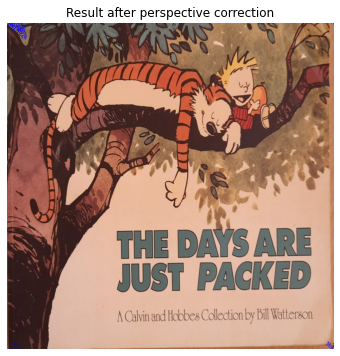

In [44]:
H = homography(pts1, pts2)
result = cv2.warpPerspective(img1, H, (4000,4000))

fig = plt.figure(figsize = (10,6))
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.title("Result after perspective correction")
plt.axis('off')
plt.show()

### b) Photoshopping:



Two images are taken for the purpose of photoshopping. We want take the face of the person of image 1 and paste it on image 2. For this, first using homography we will get a straight face of the person of image 1. Using Another homography to put face 1 to replace face 2. Then the background of that image would be substituted by background of image 2.  



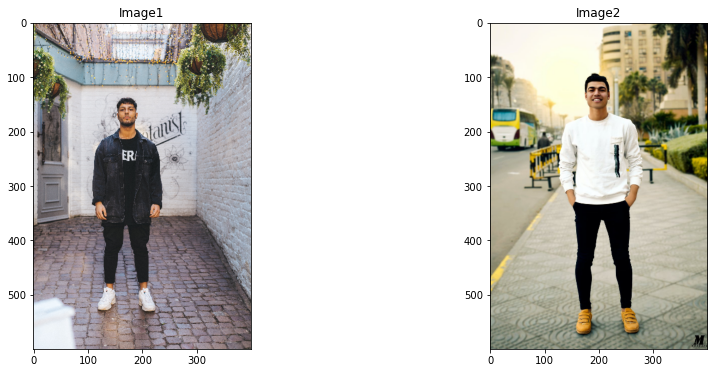

In [58]:
img_1 = cv2.resize(cv2.imread('1.jpeg'),(400,600))
img_2 = cv2.resize(cv2.imread('2.jpeg'),(400,600))

fig, axs = plt.subplots(1,2, figsize = (15,6))
axs[0].imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
axs[0].set_title("Image1")
axs[1].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
axs[1].set_title("Image2")
plt.show()

In [59]:
## Extracting image1 face co-ordinates
img = img_1.copy()
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

153   142
193   144
157   189
192   185


In [60]:
### Extracting image2 face co-ordinates
img = img_2.copy()
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

173   97
218   97
177   154
221   151


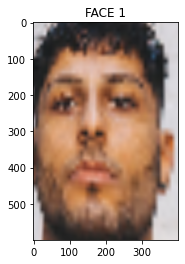

In [61]:

pts1 = np.array([[153,142],[193,144],[157,189],[192,185]])
pts2 = np.array([[0,0],[399,0],[0,599],[399,599]])

H,_ = cv2.findHomography(pts1,pts2)
H = H.reshape((3,3))
face_1 = cv2.warpPerspective(img_1,H, (400,600))
plt.imshow(cv2.cvtColor(face_1,cv2.COLOR_BGR2RGB))
plt.title("FACE 1")
plt.show()

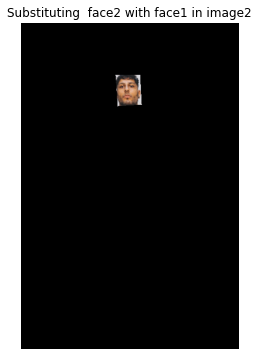

In [62]:
pts2 = np.array([[0,0],[399,0],[0,599],[399,599]])
pts3 = np.array([[173,97],[218,97],[177,154],[221,151]])
t = img_2.copy()

H = homography(pts2, pts3)
H = H.reshape((3,3))

result = cv2.warpPerspective(face_1, H, (400,600))

fig = plt.figure(figsize = (10,6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Substituting  face2 with face1 in image2")
plt.axis('off')
plt.show()

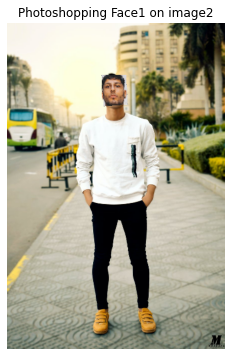

In [63]:
#Substituting black background with background of image2
result2 = np.zeros((600,400,3),dtype = np.uint8)
for i in range(600):
    for j in range(400):
        is_bg_black = True
        for k in range(3):
            if result[i,j,k] !=0:
                is_bg_black = False

        if is_bg_black:
            for k in range(3):
                result2[i,j,k] = t[i,j,k]
        else:
            for k in range(3):
                result2[i,j,k] = result[i,j,k] 

fig = plt.figure(figsize = (10,6))
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title("Photoshopping Face1 on image2")
plt.axis('off')
plt.show()